# Task 2

### Installing required libraries

In [1]:
pip install qiskit qiskit_aer pylatexenc --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.3 MB/s eta 0:00:00


### Implementing the unbiased 1-level Galton Board

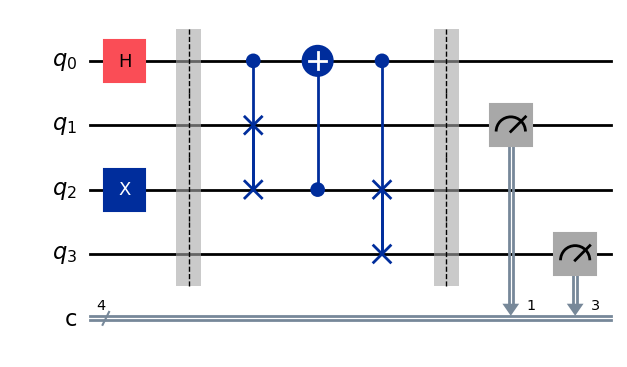

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(4,"q")
c = ClassicalRegister(4,"c")
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.x(q[2])

qc.barrier()

qc.cswap(q[0],q[1],q[2])
qc.cx(q[2],q[0])
qc.cswap(q[0],q[2],q[3])

qc.barrier()

qc.measure(q[1],c[1])
qc.measure(q[3],c[3])

qc.draw(output="mpl")

{'0010': 483, '1000': 517}


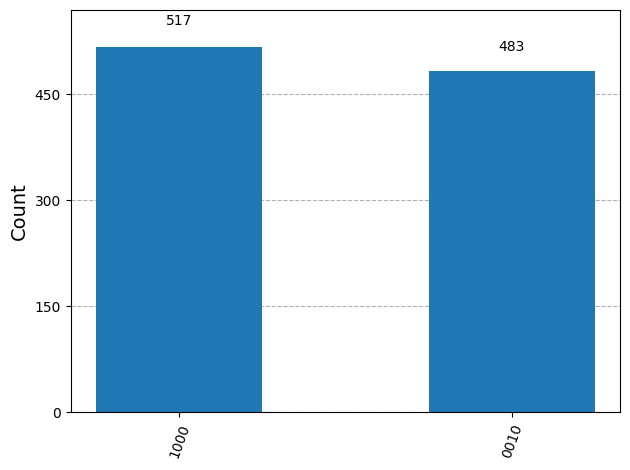

In [3]:
from qiskit_aer import AerSimulator

job = AerSimulator().run(qc,shots=1000)
counts = job.result().get_counts(qc)

print(counts) #result is printed as |q_3 q_2 q_1 q_0>
# we can see the result is almost 500-500

from qiskit.visualization import plot_histogram
plot_histogram(counts, sort='desc')

Since the result only contains two qubits, the gaussian distribution pattern of the graph wont be that visible. We move on to the unbiased 2-level QGB

### Implementing the unbiased 2-level Galton Board

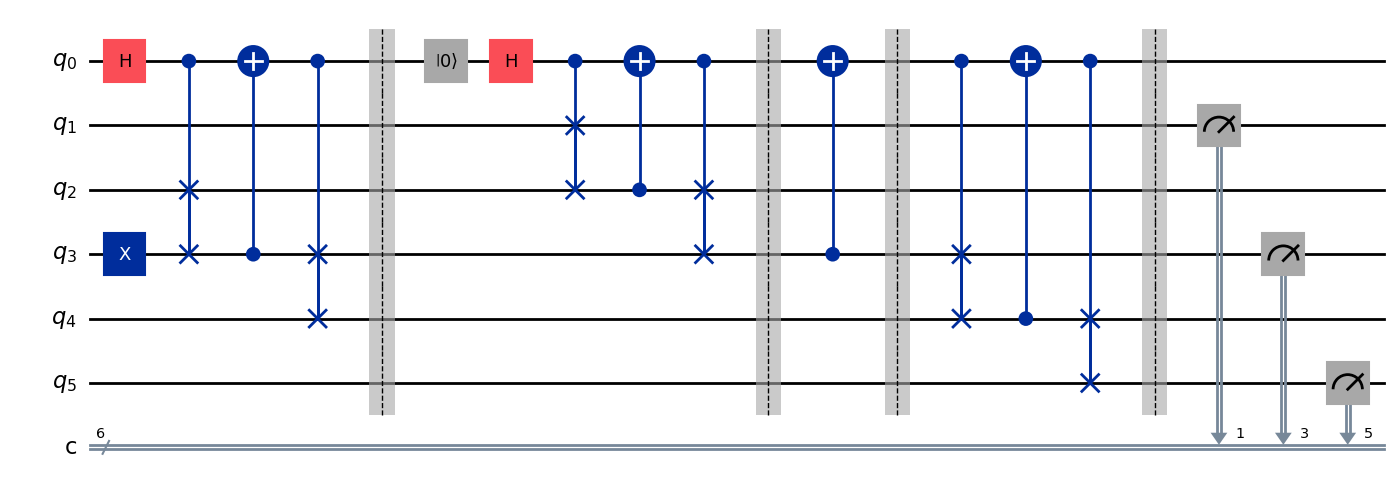

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(6,"q")
c = ClassicalRegister(6,"c")
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.x(q[3])

qc.cswap(q[0],q[2],q[3])
qc.cx(q[3],q[0])
qc.cswap(q[0],q[3],q[4])

qc.barrier()

qc.reset(q[0])
qc.h(q[0])

qc.cswap(q[0],q[1],q[2])
qc.cx(q[2],q[0])
qc.cswap(q[0],q[2],q[3])

qc.barrier()

qc.cx(q[3],q[0])

qc.barrier()

qc.cswap(q[0],q[3],q[4])
qc.cx(q[4],q[0])
qc.cswap(q[0],q[4],q[5])

qc.barrier()

qc.measure(q[1],c[1])
qc.measure(q[3],c[3])
qc.measure(q[5],c[5])

qc.draw(output="mpl")

### Implementing the unbiased 2-level Galton Board: Histogram

{'100000': 2525, '001000': 5009, '000010': 2466}


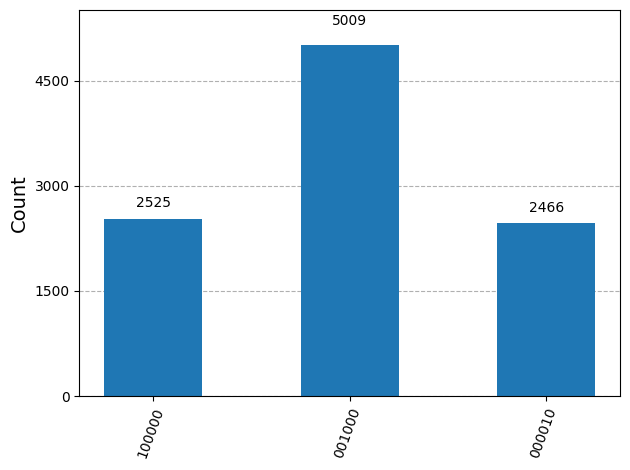

In [5]:
from qiskit_aer import AerSimulator

job = AerSimulator().run(qc,shots=10000)
counts = job.result().get_counts(qc)

print(counts) #result is printed as |q_5 q_4 q_3 q_2 q_1 q_0>
# we can see the result is almost 250-500-250

from qiskit.visualization import plot_histogram
plot_histogram(counts, sort='desc')

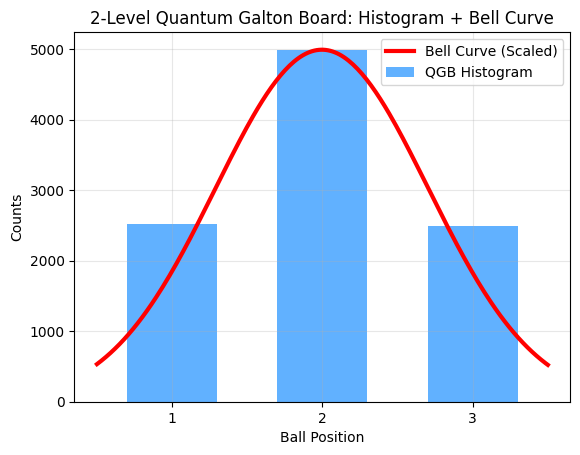

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


counts = {'000010': 2520, '100000': 2486, '001000': 4994}

data = []
for bitstring, count in counts.items():
    pos = bitstring[::-1].index('1')
    data.extend([pos] * count)


label_map = {1: 1, 3: 2, 5: 3}
positions = sorted(set(data))
mapped_positions = [label_map[p] for p in positions]
mapped_data = [label_map[d] for d in data]


counts_list = [mapped_data.count(p) for p in mapped_positions]


plt.bar(mapped_positions, counts_list, width=0.6, alpha=0.7, color='dodgerblue', label='QGB Histogram')

mean = np.mean(mapped_data)
std = np.std(mapped_data)
x = np.linspace(min(mapped_positions)-0.5, max(mapped_positions)+0.5, 200)
pdf = norm.pdf(x, mean, std)

scale = max(counts_list) / max(pdf)
plt.plot(x, pdf * scale, 'r-', lw=3, label='Bell Curve (Scaled)')


plt.xticks(mapped_positions)
plt.xlabel("Ball Position")
plt.ylabel("Counts")
plt.title("2-Level Quantum Galton Board: Histogram + Bell Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Implementing the unbiased n-level Galton Board

No. of levels = 6


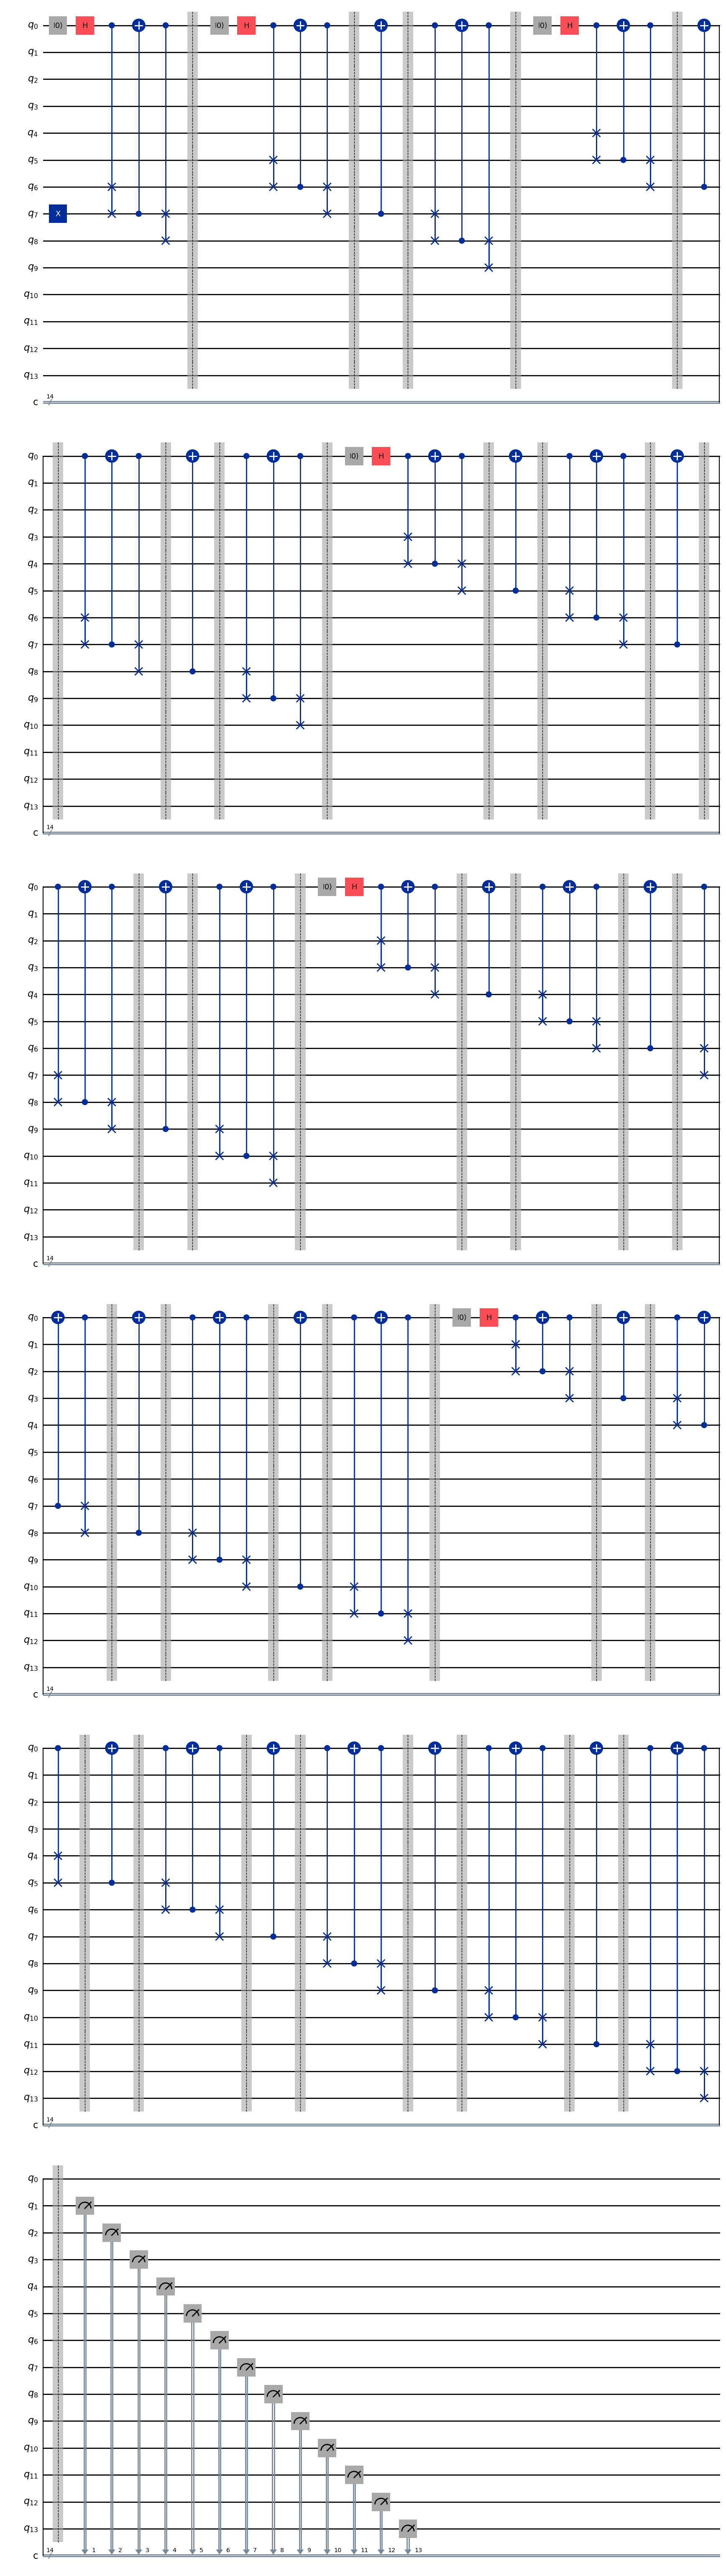

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

n = int(input("No. of levels = ")) # Example: taking n=4
q = QuantumRegister(2*n+2, "q") # # of qubits=10
c = ClassicalRegister(2*n+2, "c")
qc = QuantumCircuit(q, c)

qc.x(q[n+1])

# looping
for level in range(n): # level = [0,1,2,3]
  qc.reset(q[0])
  qc.h(q[0])
  for pos in range(level+1): # eg: for level+1 = 3: pos = [0,1,2]
      right  = n - level + 2*pos # eg: for pos=2: right=6
      mid   = right + 1 # mid=7
      left = right + 2 # left=8

      qc.cswap(q[0], q[right], q[mid])
      qc.cx(q[mid], q[0])
      qc.cswap(q[0], q[mid], q[left])
      qc.barrier()
      if pos<level:
        qc.cx(q[left],q[0])
        qc.barrier()


# Measurement
for i in range(2*n + 1):
  qc.measure(q[i+1], c[i+1])

qc.draw(output="mpl")


Running the AerSimulator for measurement

In [ ]:
from qiskit_aer import AerSimulator

job = AerSimulator().run(qc,shots=10000)
counts = job.result().get_counts(qc)

print(counts)

{'00000000001000': 958, '00100000000000': 892, '10000000000000': 148, '00000000000010': 146, '00000010000000': 3182, '00001000000000': 2390, '00000000100000': 2284}


The result is printed as  
`|q_(2n+1)...q_5 q_4 q_3 q_2 q_1 q_0>`

We can see the result is  

$$
\frac{1}{2^n} \, C^n_k
$$  

where  

$$
C^n_k = \frac{n!}{k! \, (n-k)!}
$$  

**Example:**  
For \( n = 4, k = 2 \):  

- This means for the measurement when qubit \( |q_{(2k+1)}\rangle = |q_5\rangle = 1 \) and other qubits \( |q_9\rangle, \dots, |q_6\rangle, |q_4\rangle, \dots, |q_1\rangle = 0 \)  

- The probability (out of 1) for this measurement occurring is  

$$
\frac{1}{2^4} \cdot \frac{4!}{2! \, (4-2)!} = \frac{3}{2^3} = 0.375
$$  

- When multiplied by our number of shots:  

$$
0.375 \times 10000 = 3750
$$  

That’s what we get for `0000100000`.

**Note:** Unmeasured qubits are also included by denoting their state as 0.

Making the Histogram for n-level QGB

### Implementing the unbiased n-level Galton Board: Histogram

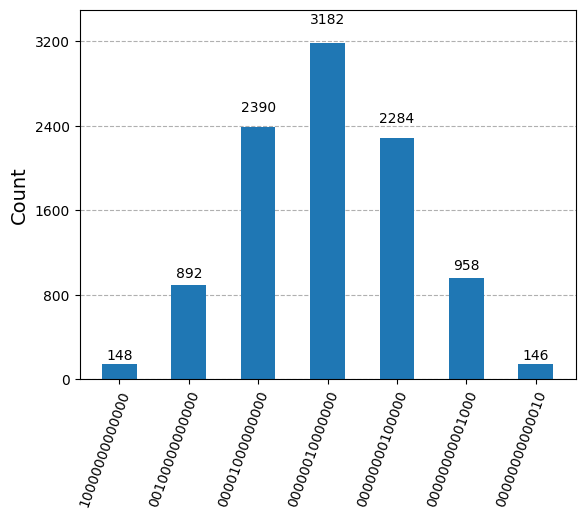

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,sort='desc')

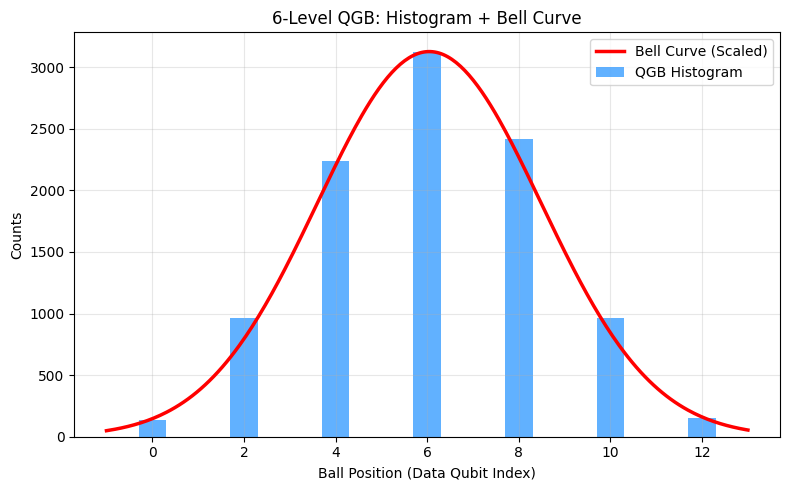

In [ ]:
data = []
for bitstring, count in counts.items():
    rev = bitstring[::-1]
    data_bits = rev[1:2 * n + 2]  # q[1] to q[2n+1]
    if '1' in data_bits:
        pos = data_bits.index('1')
        data.extend([pos] * count)


positions = sorted(set(data))
counts_list = [data.count(p) for p in positions]

plt.figure(figsize=(8, 5))
plt.bar(positions, counts_list, width=0.6, alpha=0.7, color='dodgerblue', label='QGB Histogram')

# Fit bell curve
mean = np.mean(data)
std = np.std(data)
x = np.linspace(min(positions) - 1, max(positions) + 1, 300)
pdf = norm.pdf(x, mean, std)

scale = max(counts_list) / max(pdf)
plt.plot(x, pdf * scale, 'r-', lw=2.5, label='Bell Curve (Scaled)')

plt.xticks(positions)
plt.xlabel("Ball Position (Data Qubit Index)")
plt.ylabel("Counts")
plt.title(f"{n}-Level QGB: Histogram + Bell Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Task 3

## Part A: Exponential Distribution

The **Exponential distribution** is a continuous probability distribution often used to model the time between events in a Poisson process.

Its probability density function (PDF) is:

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

Here, $\lambda > 0$ is the **rate parameter** of the distribution.

---

The parameter $\lambda$ controls how **fast the probability decays** as $x$ increases:

- A **larger $\lambda$** means the distribution decays more rapidly — events tend to happen **sooner**.
- A **smaller $\lambda$** results in a slower decay — events tend to occur **later** on average.

The mean (expected value) and variance of the exponential distribution are:

$$
\mathbb{E}[X] = \frac{1}{\lambda}, \quad \text{Var}(X) = \frac{1}{\lambda^2}
$$

So increasing $\lambda$ makes the distribution more concentrated near zero, while decreasing $\lambda$ spreads it out over a longer range.


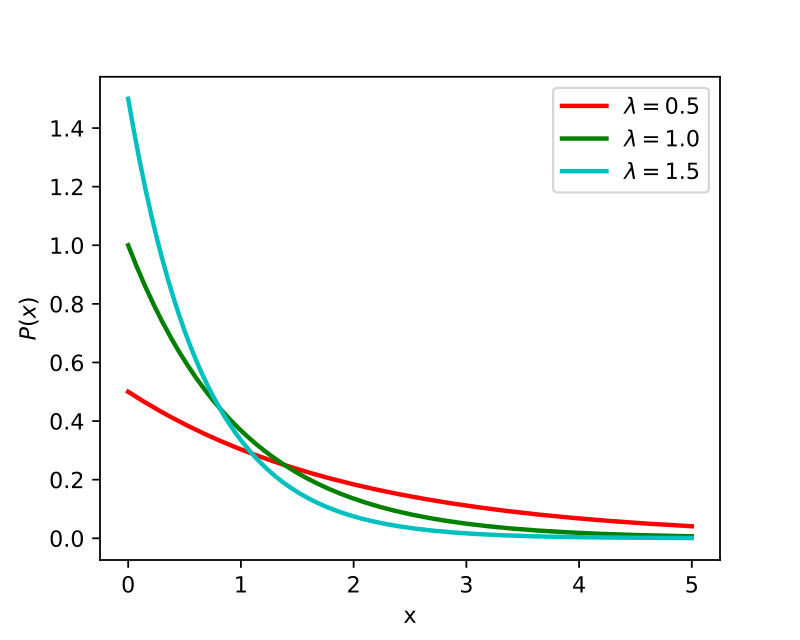



To introduce bias, we change from an unbiased coin operator `H` to an $r_y$ rotation that introduces bias such as:

$
R_y(\theta) =
\begin{bmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{bmatrix}
$

Now we need to map $\lambda$ to the angle $\theta$:

$\text{Let } p = \sin^2\left(\frac{\theta}{2}\right)$

$P(x) = p^x = \left[\sin^2\left(\frac{\theta}{2}\right)\right]^x$

$\text{We want this to match: } P(x) = \lambda e^{-\lambda x} $
$$
\Rightarrow p^x = e^{-\lambda x} \Rightarrow p = e^{-\lambda} \\
\Rightarrow \sin^2\left(\frac{\theta}{2}\right) = e^{-\lambda} \\
\Rightarrow \frac{\theta}{2} = \arcsin\left(e^{-\lambda/2}\right) \\
\boxed{\theta = 2 \arcsin\left(e^{-\lambda/2}\right)}
$$


==Note to self== : parametrize circuit to make the map match the theoretical value

In [ ]:
# map lambda to an angle theta
def theta_for_lambda(lambd):
    return 2 * np.arcsin(np.exp(-lambd / 2))

No. of levels = 6


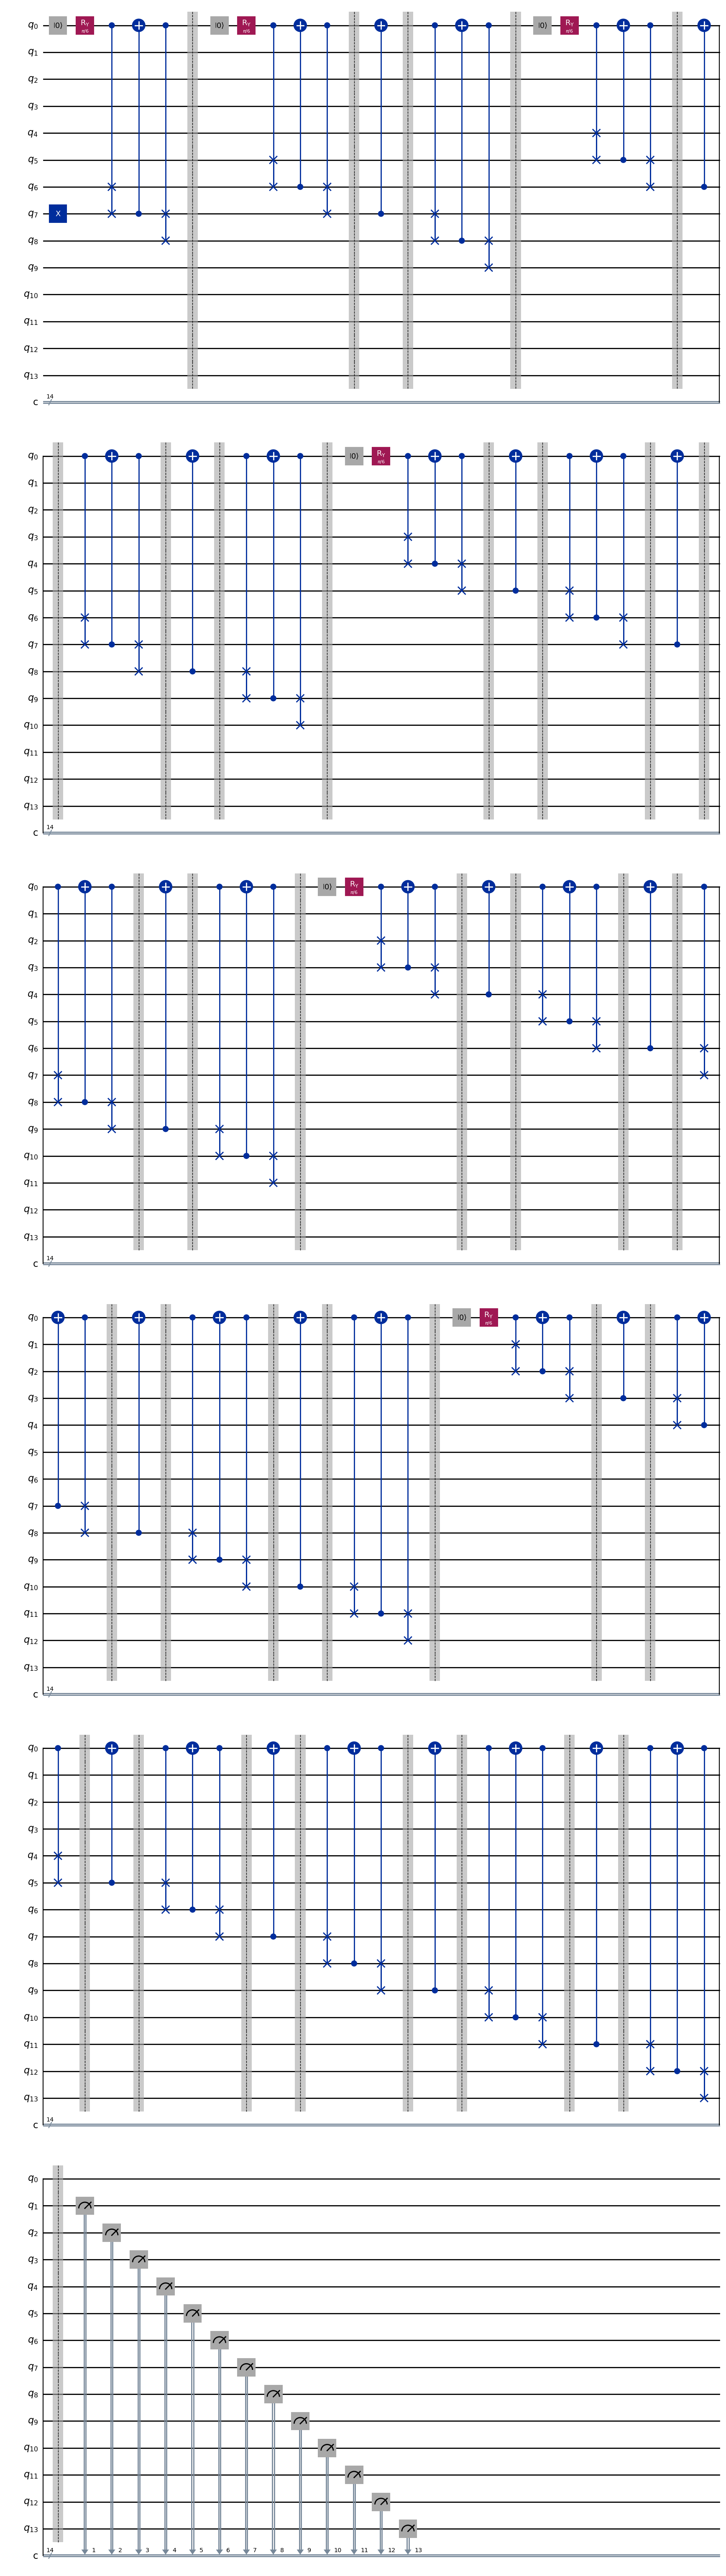

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

# map lambda to an angle theta
#theta = theta_for_lambda(0.5)

n = int(input("No. of levels = ")) # Example: taking n=4
q = QuantumRegister(2*n+2, "q") # # of qubits=10
c = ClassicalRegister(2*n+2, "c")
qc = QuantumCircuit(q, c)

qc.x(q[n+1])

# looping
for level in range(n): # level = [0,1,2,3]
  qc.reset(q[0])

  # introduce bias based on theta.
  qc.ry(np.pi/6, q[0])
  for pos in range(level+1): # eg: for level+1 = 3: pos = [0,1,2]
      right  = n - level + 2*pos # eg: for pos=2: right=6
      mid   = right + 1 # mid=7
      left = right + 2 # left=8

      qc.cswap(q[0], q[right], q[mid])
      qc.cx(q[mid], q[0])
      qc.cswap(q[0], q[mid], q[left])
      qc.barrier()
      if pos<level:
        qc.cx(q[left],q[0])
        qc.barrier()


# Measurement
for i in range(2*n + 1):
  qc.measure(q[i+1], c[i+1])

qc.draw(output="mpl")


## Part A: Exponential Distribution: Histogram

{'00000010000000': 54, '00000000100000': 4, '00001000000000': 547, '10000000000000': 6549, '00100000000000': 2846}


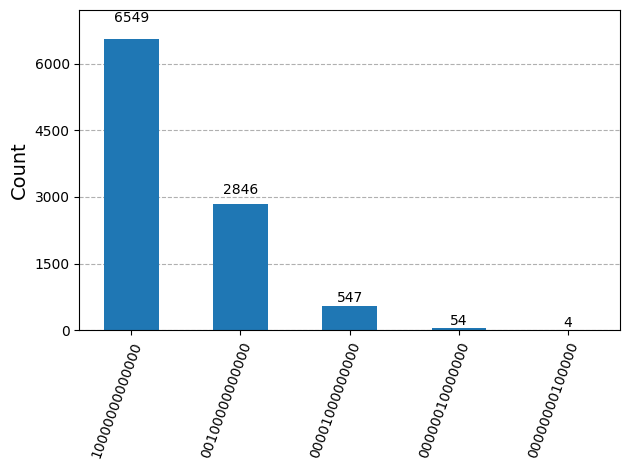

In [15]:
from qiskit_aer import AerSimulator

job = AerSimulator().run(qc,shots=10000)
counts = job.result().get_counts(qc)

print(counts) #result is printed as |q_(2n+1)...q_5 q_4 q_3 q_2 q_1 q_0>

from qiskit.visualization import plot_histogram

plot_histogram(counts, sort='desc')

## Part B: Hadamard Walk

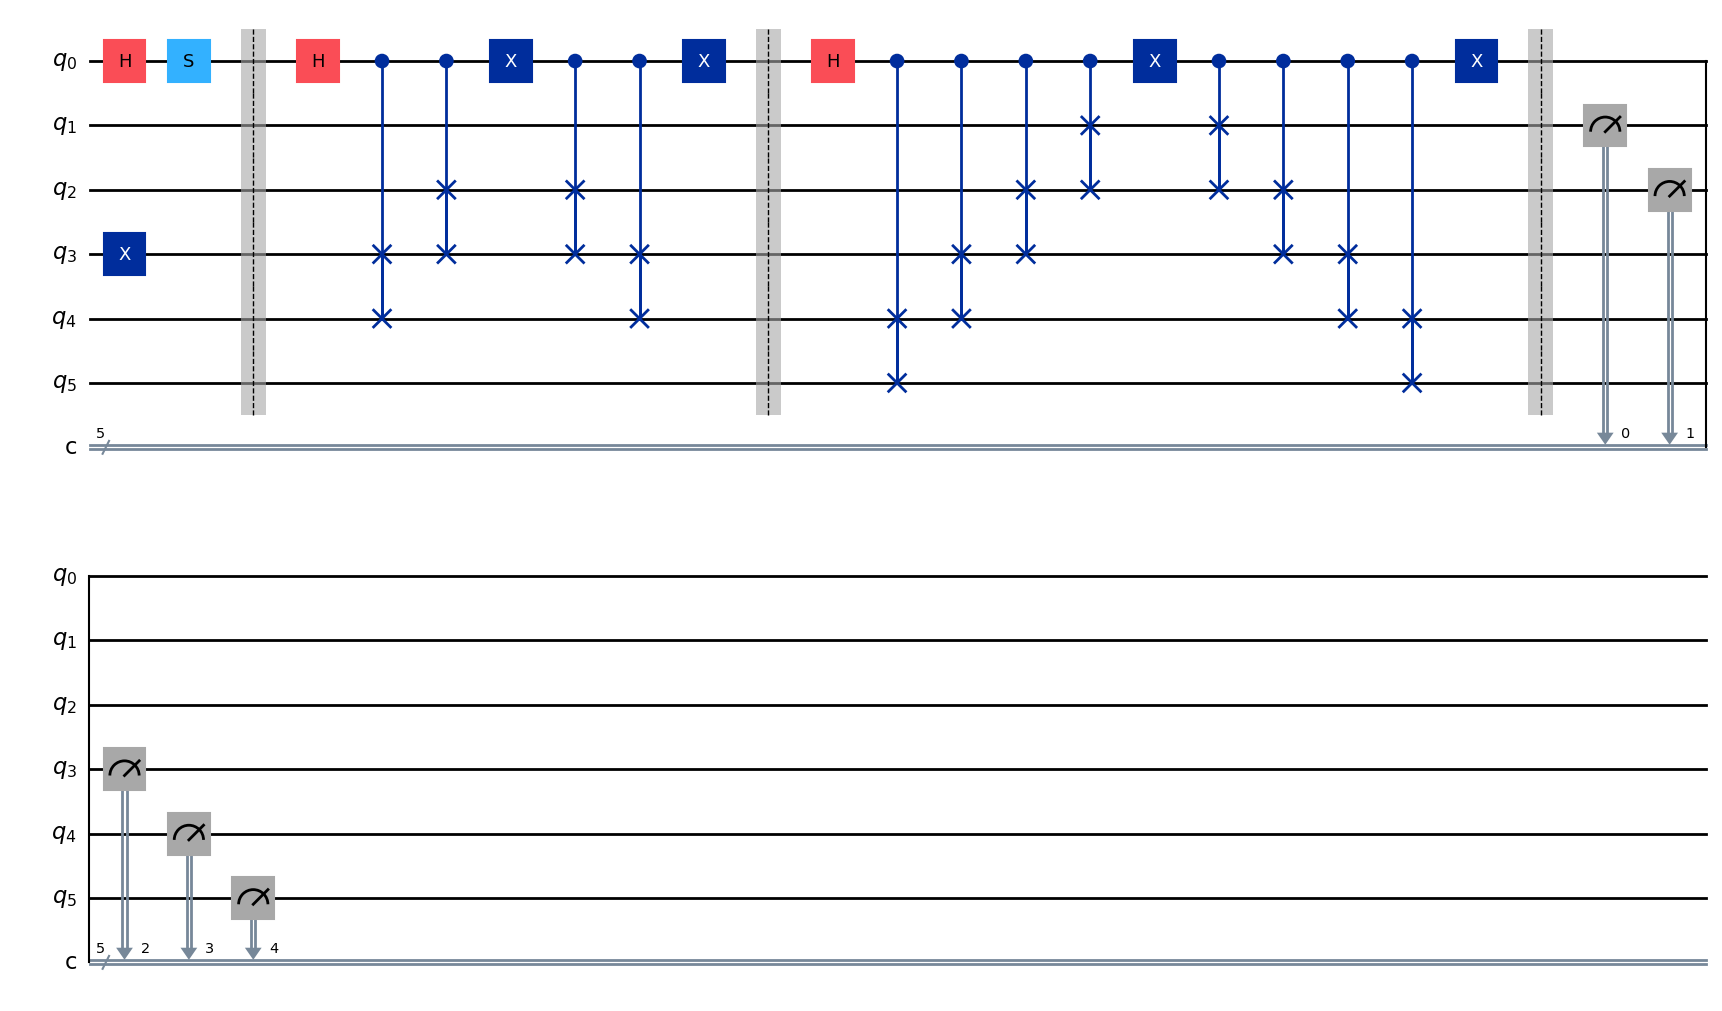

In [42]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import math

def shift_block(qc, coin, pos_qubits, step, start_index):
    """
    Move the single '1' one site right if coin==1, or one site left if coin==0.
    Only run CSWAPs for indices that could actually hold the marker at this timestep.
    step : current timestep (0-based)
    start_index : initial marker index (center)
    """
    n = len(pos_qubits)

    # possible marker positions before this shift are in [start_index-step, start_index+step]
    left_pos  = max(0, start_index - step)
    right_pos = min(n - 1, start_index + step)

    # To move right we need cswap at i = k for k in [left_pos, right_pos] swapping pos[k] <-> pos[k+1].
    # For the right-moving sweep we iterate from right to left (so only the correct single swap executes).
    right_sweep_start = min(n - 2, right_pos - 1)  # highest i to consider for swap i <-> i+1
    right_sweep_end   = left_pos                   # inclusive lower bound for i

    for i in range(right_sweep_start, right_sweep_end - 1, -1):
        qc.cswap(coin, pos_qubits[i], pos_qubits[i+1])

    # left move when coin==0: flip coin, sweep left->right over same relevant window, flip back
    qc.x(coin)
    left_sweep_start = left_pos
    left_sweep_end   = min(n - 2, right_pos - 1)

    for i in range(left_sweep_start, left_sweep_end + 1):
        qc.cswap(coin, pos_qubits[i], pos_qubits[i+1])
    qc.x(coin)


def hadamard_walk_unary(T, pos_size, start_index):
    # pos_size should be >= 2*T + 1 ideally
    q = QuantumRegister(1 + pos_size, 'q')  # q[0] coin, q[1..] position
    c = ClassicalRegister(pos_size, 'c')
    qc = QuantumCircuit(q, c)

    coin = q[0]
    pos = [q[i+1] for i in range(pos_size)]

    # initialize unary position: set a single 1 at start_index
    qc.x(pos[start_index])

    # prepare symmetric coin initial state: H then S gives (|0> + i|1>)/sqrt(2)
    qc.h(coin)
    qc.s(coin)

    # T steps: coin operator then shift
    for step in range(T):
        qc.barrier()
        qc.h(coin)                            # Hadamard coin at each step
        shift_block(qc, coin, pos, step+1, start_index)
    qc.barrier()

    # measure full position register (all unary bits)
    for i, pb in enumerate(pos):
        qc.measure(pb, c[i])

    return qc

# Example Hadamard walk circuit

T = 2 # This represents the level analogues to the QGB
pos_size = 2*T + 1   # This represents the number of qubits
start = T            # center start
qc = hadamard_walk_unary(T, pos_size, start)
qc.draw(output='mpl')

## Part B: Hadamard Walk: Histogram

Showing histogram plot for $T = 100$

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/counts_visualization.py:412: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


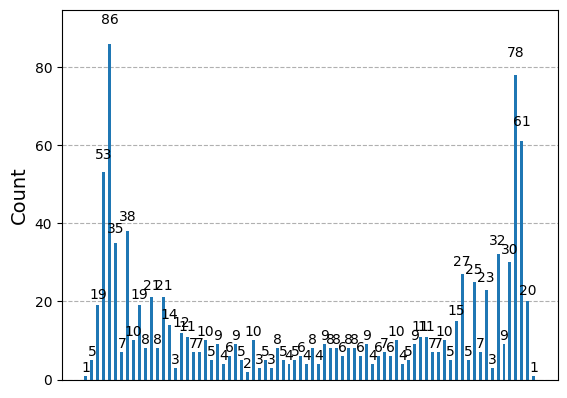

In [40]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib as plt

sim = AerSimulator(method='matrix_product_state')
job = sim.run(qc,shots=1000)
counts = job.result().get_counts(qc)


hist = plot_histogram(counts, sort='desc')
ax = hist.gca()
ax.get_xaxis().set_visible(False)  # hides the x-axis completely

hist